In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class PopulationGrowth:
    def __init__(self,growth,c,xlim,ylim,sf_density):
        """
PARAMS
    growth      | float, growth rate per cycle
    c           | float, constant value added each turn
    xlim        | int, domain of graph ranges from [0, xlim]
    ylim        | int, range of graph ranges from [0, ylim]
    sf_density  | int, slope field density
        """
        self.growth = growth
        self.c = c
        self.x_start = 0
        self.x_end = xlim
        self.y_start = 0
        self.y_end = ylim
        self.sf_density = sf_density
    
    def __growth_slope(self,pop,growth,c):
        return (1+growth)*pop - pop + c
    
    def __euler(self,func,x,y,h,n,growth,c): 
        x_list = []
        y_list = []
        temp_x = x
        temp_y = y
        for i in range(n): 
            x_list.append(temp_x)
            y_list.append(temp_y)
            temp_y = temp_y + h * func(temp_y, growth,c) 
            temp_x = temp_x + h

        return x_list,y_list
    
    def __loc(self,slope,domain,x1,y1):
        z = slope*(domain-x1)+y1
        return z
    
    def show(self):
        "Show slope field"
        x = np.linspace(self.x_start,self.x_end,self.sf_density)
        y = np.linspace(self.y_start,self.y_end,self.sf_density)
        plt.figure(figsize=(8,8))
        for j in x:
            for k in y:
                
                slope = self.__growth_slope(k,self.growth,self.c)
                domain = np.linspace(j-0.15,j+0.15,2)
                plt.plot(domain,self.__loc(slope,domain,j,k),solid_capstyle='projecting',solid_joinstyle='bevel',color='black',alpha=0.4)
        plt.title("Slope field y'")
        plt.grid(True)
        plt.ylim(self.y_start,self.y_end)
        plt.xlim(self.x_start,self.x_end)
        plt.ylabel('Population')
        plt.xlabel('Time')
        plt.show()
        
                
    def curve(self,starting_pop):
        "Show population growth with given parameters along one line"
        sol_x,sol_y = self.__euler(self.__growth_slope,0,starting_pop,1,self.x_end+1,self.growth,self.c)
        x = np.linspace(self.x_start,self.x_end,self.sf_density)
        y = np.linspace(self.y_start,self.y_end,self.sf_density)
        plt.figure(figsize=(8,8))
        for j in x:
            for k in y:
                slope = self.__growth_slope(k,self.growth,self.c)
                domain = np.linspace(j-0.15,j+0.15,2)
                plt.plot(domain,self.__loc(slope,domain,j,k),solid_capstyle='projecting',solid_joinstyle='bevel',color='black',alpha=0.4)
        plt.title("Slope field y' | Starting Pop: {} | Ending Pop:{} | Cycles: {}".format(round(sol_y[0]),round(sol_y[-1]),self.x_end),fontsize=13,alpha=0.8)
        plt.plot(sol_x,sol_y,color='red',alpha=0.8)
        plt.grid(True)
        plt.ylim(self.y_start,self.y_end)
        plt.xlim(self.x_start,self.x_end)
        plt.ylabel('Population',fontsize=13,alpha=0.8)
        plt.xlabel('Time',fontsize=13,alpha=0.8)
        plt.show()

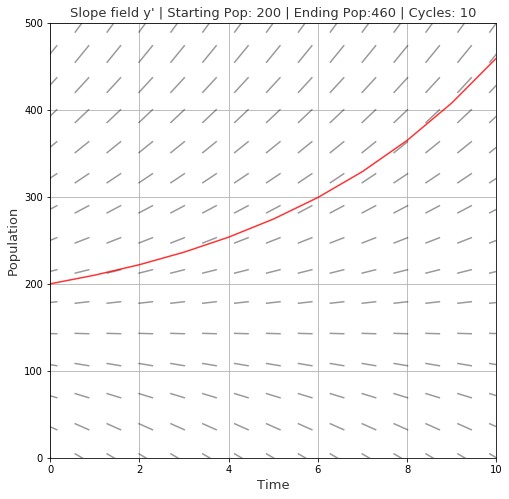

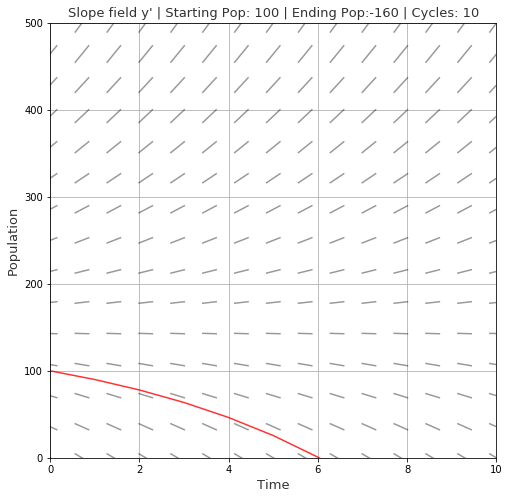

In [8]:
model = PopulationGrowth(growth=0.2,c=-30,xlim=10,ylim=500,sf_density=15)
model.curve(starting_pop=200)
model.curve(starting_pop=100)